# Comparison of KS models (3 and 4)

In [1]:
# import minirats
import minirats.utils.py.readwrite.ramses_info as ri

# import ratatouille
from ratatouille import readNsave as ras
from ratatouille import plotutils as put

# imports others
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.facecolor']='w'
plt.rcParams['font.size'] = 8

In [3]:
RamsesDir = '/home/max/PhD/Simus/Offline_temp/'
timestep  = 17

info = ri.rd_info(timestep,RamsesDir)
size_box_kpc = info['boxlen']

cen = size_box_kpc/2
center = [cen,cen,cen]

In [4]:
logscale = True
rad_kpc = 20
binsize_aim = 1                    # [kpc]
lim_sfr = 100                       # [Myr]

lims = 2e-1, 2e1

# binsize_aim variation
-> both seem to approximately vary in the same way

In [5]:
binsize_aim = [0.5, 1.,2,4]                    # [kpc]
dat3=[]
dat4=[]
for bini in binsize_aim:
    dat3.append(put.KS_from_file(RamsesDir, timestep, rad_kpc, rebin='3', \
                                 binsize_aim=bini, lim_sfr=lim_sfr, forlog=True))

    dat4.append(put.KS_from_file(RamsesDir, timestep, rad_kpc, rebin='4', \
                                 binsize_aim=bini, lim_sfr=lim_sfr, forlog=True))
binsize_aim = 1 # put it back to normal for next cells

The size of the bins is ~ 0.476 kpc
The size of the bins is ~ 0.988 kpc
The size of the bins is ~ 1.976 kpc
The size of the bins is ~ 3.989 kpc


coefs of the best fits by model
[array([ 2.40880153, -4.99542078]), array([ 2.65165224, -5.07496179]), array([ 2.75242649, -4.80658186]), array([ 3.51891281, -4.20242272])]
[array([ 2.34649246, -4.96363695]), array([ 2.55433335, -5.01814715]), array([ 2.38020914, -4.64361383]), array([ 2.28576651, -4.14179453])]


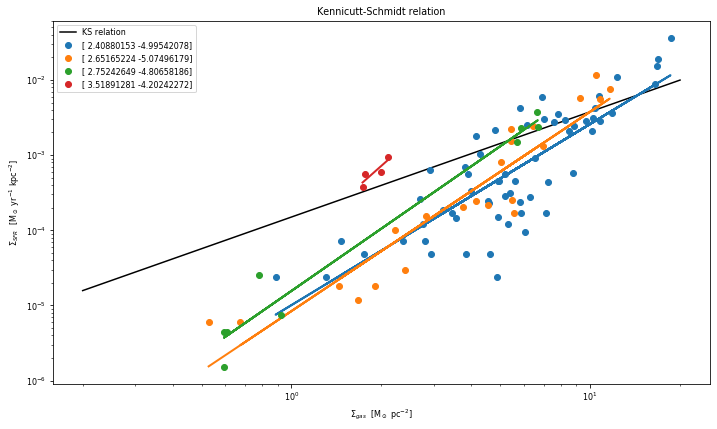

/home/max/PhD/maxutils/plotutils.py:704: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/max/.soft/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


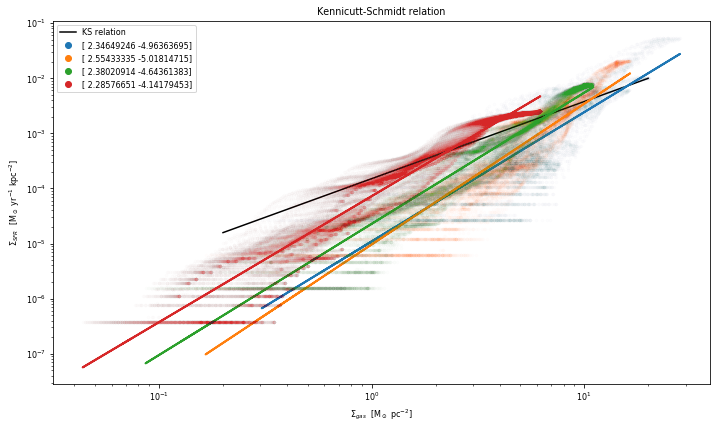

In [6]:
print('coefs of the best fits by model')
print([bleh[3] for bleh in dat3])
print([bleh[3] for bleh in dat4])
put.plot_KS(dat3, lims, IMF='Chabrier')
put.plot_KS(dat4, lims, IMF='Chabrier')


# lim_sfr variation
-> both seem to approximately vary in the same way

In [7]:
lim_sfr = [10,100]                       # [Myr]
dat3=[]
dat4=[]
for limi in lim_sfr:
    dat3.append(put.KS_from_file(RamsesDir, timestep, rad_kpc, rebin='3', \
                                 binsize_aim=binsize_aim, lim_sfr=limi, forlog=True))
    dat4.append(put.KS_from_file(RamsesDir, timestep, rad_kpc, rebin='4', \
                                 binsize_aim=binsize_aim, lim_sfr=limi, forlog=True))
    lim_sfr = 100

The size of the bins is ~ 0.988 kpc
The size of the bins is ~ 0.988 kpc


coefs of the best fits by model
[array([ 2.54743873, -4.89677247]), array([ 2.65165224, -5.07496179])]
[array([ 2.43388681, -4.84153405]), array([ 2.55433335, -5.01814715])]


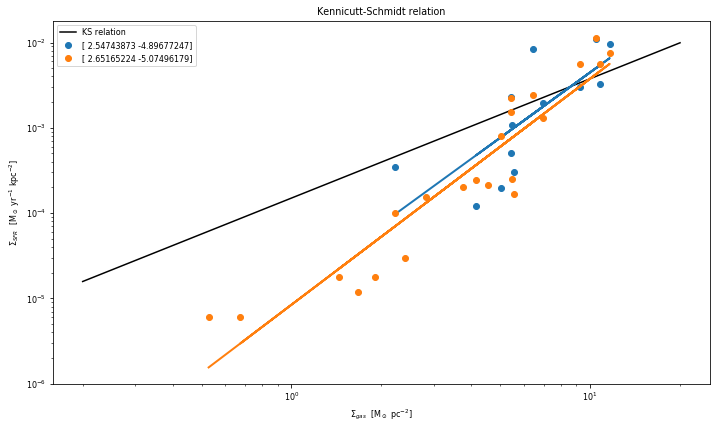

In [8]:
print('coefs of the best fits by model')
print([bleh[3] for bleh in dat3])
print([bleh[3] for bleh in dat4])
put.plot_KS(dat3, lims, IMF='Chabrier')
put.plot_KS(dat4, lims, IMF='Chabrier')

# rad_kpc variation
-> rebinv4 seems more stable

In [9]:
rad_kpc = [10,20,40,75]

dat3=[]
dat4=[]
for rad in rad_kpc:
    dat3.append(put.KS_from_file(RamsesDir, timestep, rad, rebin='3', \
                                 binsize_aim=binsize_aim, lim_sfr=lim_sfr, forlog=True))
    dat4.append(put.KS_from_file(RamsesDir, timestep, rad, rebin='4', \
                                 binsize_aim=binsize_aim, lim_sfr=lim_sfr, forlog=True))
rad_kpc = 20

The size of the bins is ~ 0.987 kpc
The size of the bins is ~ 0.988 kpc
The size of the bins is ~ 0.989 kpc
The size of the bins is ~ 0.989 kpc


coefs of the best fits by model
[array([ 2.64560805, -5.06744704]), array([ 2.65165224, -5.07496179]), array([ 2.65937336, -5.08295689]), array([ 2.66161869, -5.1035188 ])]
[array([ 2.54861911, -5.01234969]), array([ 2.55433335, -5.01814715]), array([ 2.56282137, -5.0264914 ]), array([ 2.57499446, -5.03928869])]


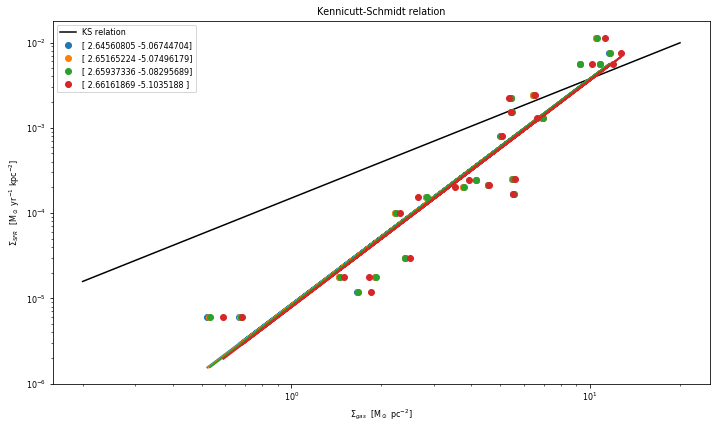

In [10]:
print('coefs of the best fits by model')
print([bleh[3] for bleh in dat3])
print([bleh[3] for bleh in dat4])
put.plot_KS(dat3, lims, IMF='Chabrier')
put.plot_KS(dat4, lims, IMF='Chabrier')

# thresh variation (for rebin_v4)
-> both seem to approximately vary in the same way

In [11]:
threshold = [None, 1e-5, 1e-4, 1e-3]
dat3=[]
dat4=[]

for thresh in threshold:
    sig_gas3, sig_sfr3, sig_sfr3_fit, coef3 = put.KS_from_file(RamsesDir, timestep, rad_kpc, \
            rebin='3', binsize_aim=binsize_aim, lim_sfr=lim_sfr, thresh=thresh, forlog=True)
    dat3.append([sig_gas3, sig_sfr3, sig_sfr3_fit,coef3])
    sig_gas4, sig_sfr4, sig_sfr4_fit, coef4 = put.KS_from_file(RamsesDir, timestep, rad_kpc, \
            rebin='4', binsize_aim=binsize_aim, lim_sfr=lim_sfr, thresh=thresh, forlog=True)
    dat4.append([sig_gas4, sig_sfr4, sig_sfr4_fit,coef4])

The size of the bins is ~ 0.988 kpc
The size of the bins is ~ 0.988 kpc
The size of the bins is ~ 0.988 kpc
The size of the bins is ~ 0.988 kpc


In [12]:
print([bleh[3] for bleh in dat3])
print([bleh[3] for bleh in dat4])
put.plot_KS(dat3, lims, IMF='Chabrier', plot_data=False)
put.plot_KS(dat4, lims, IMF='Chabrier', plot_data=False)

[array([ 2.65165224, -5.07496179]), array([ 3.21398603, -5.48761893]), array([ 3.03250829, -5.33016389]), array([ 2.21768983, -4.43880275])]
[array([ 2.55433335, -5.01814715]), array([ 2.66720942, -5.07717631]), array([ 2.8158236 , -5.15019093]), array([ 2.18833622, -4.45929058])]
